In [71]:
import pandas as pd
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [39]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())


# View data types to confirm correctness
print("Data types:\n", df.dtypes)

#View duplicate samples(rows) from df
duplicate_samples = df[df.duplicated(keep=False)]  #Marks all occurrences of duplicate rows as duplicates.
print(duplicate_samples)

Missing values in each column:
 Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
Data types:
 Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
Empty DataFrame
Columns: [Posted On, BHK, Rent, Size, Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Preferred, Bathroom, Point of Contact]
Index: []


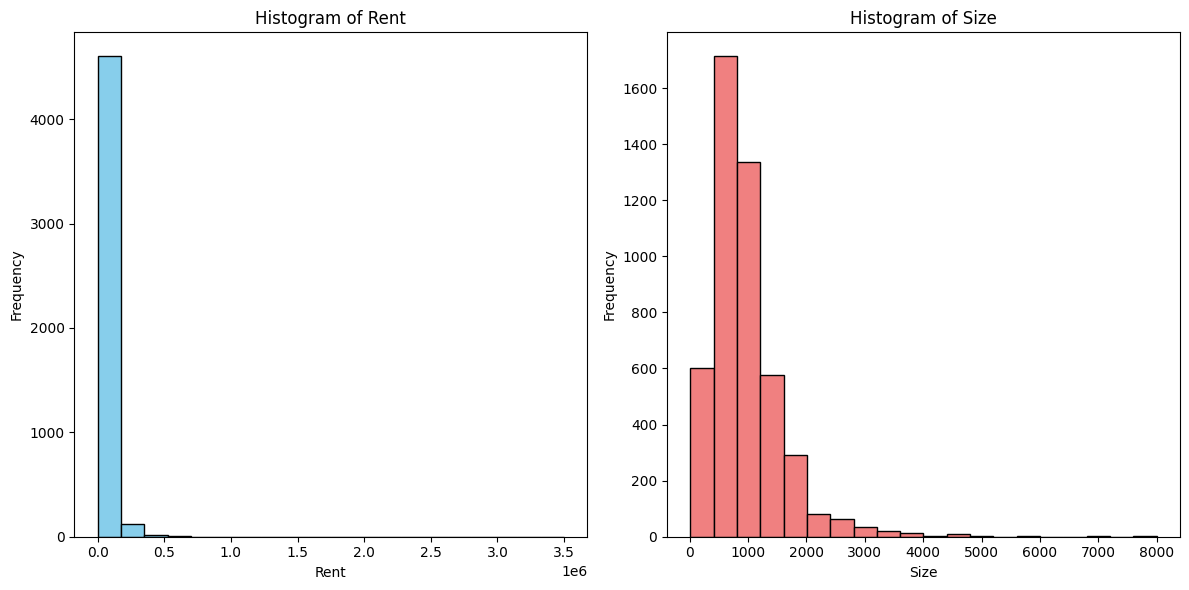

In [40]:
# prompt: plot histogram of rent and size

import pandas as pd
import matplotlib.pyplot as plt

# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Rent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Histogram of Rent')

plt.subplot(1, 2, 2)
plt.hist(df['Size'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram of Size')


plt.tight_layout()
plt.show()

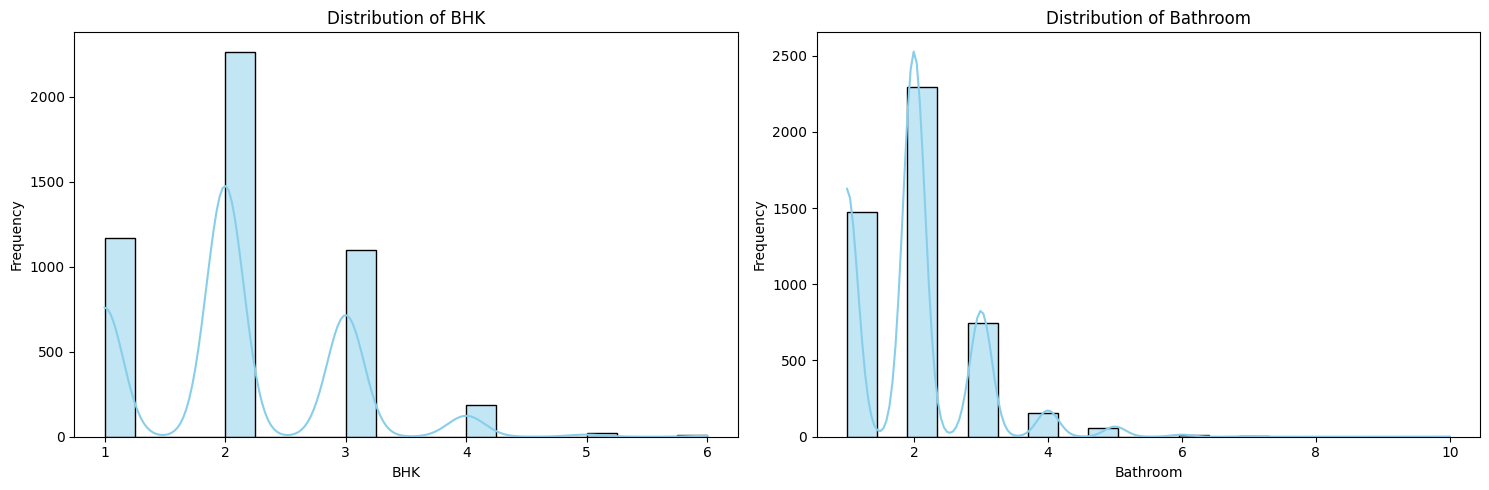

In [41]:
# prompt: Visualize distributions for each numeric column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the provided code

# List of numeric columns to visualize (excluding 'Rent' and 'Size' which are already plotted)
numeric_cols = ['BHK', 'Bathroom']

# Create subplots
num_plots = len(numeric_cols)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')  # Use seaborn for better aesthetics
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

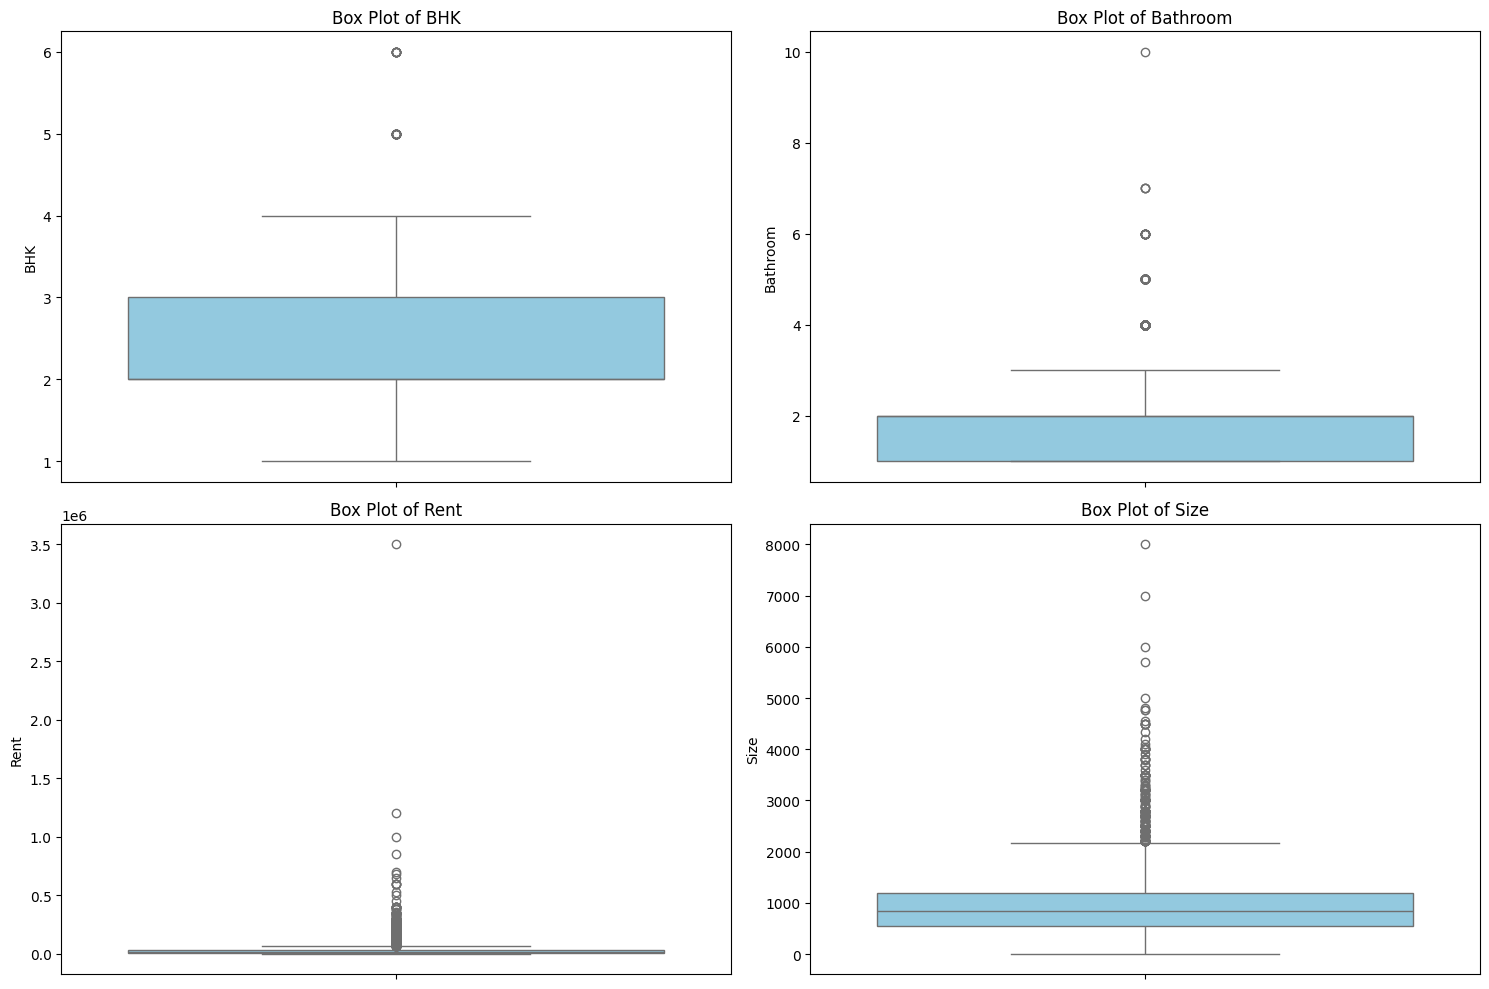

In [42]:
# prompt: plot box plot

# Assuming df is already loaded as in the provided code

# List of numeric columns to visualize (excluding 'Rent' and 'Size' which are already plotted)
numeric_cols = ['BHK', 'Bathroom', 'Rent', 'Size']

# Create subplots
num_plots = len(numeric_cols)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')  # Use seaborn for better aesthetics
    plt.ylabel(col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [43]:
# prompt: remove outliers from BHK, Bathroom, Rent, Size

import pandas as pd

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Example usage (assuming 'df' is your DataFrame):
columns_to_clean = ['BHK', 'Bathroom', 'Rent', 'Size']
df = remove_outliers_iqr(df, columns_to_clean)

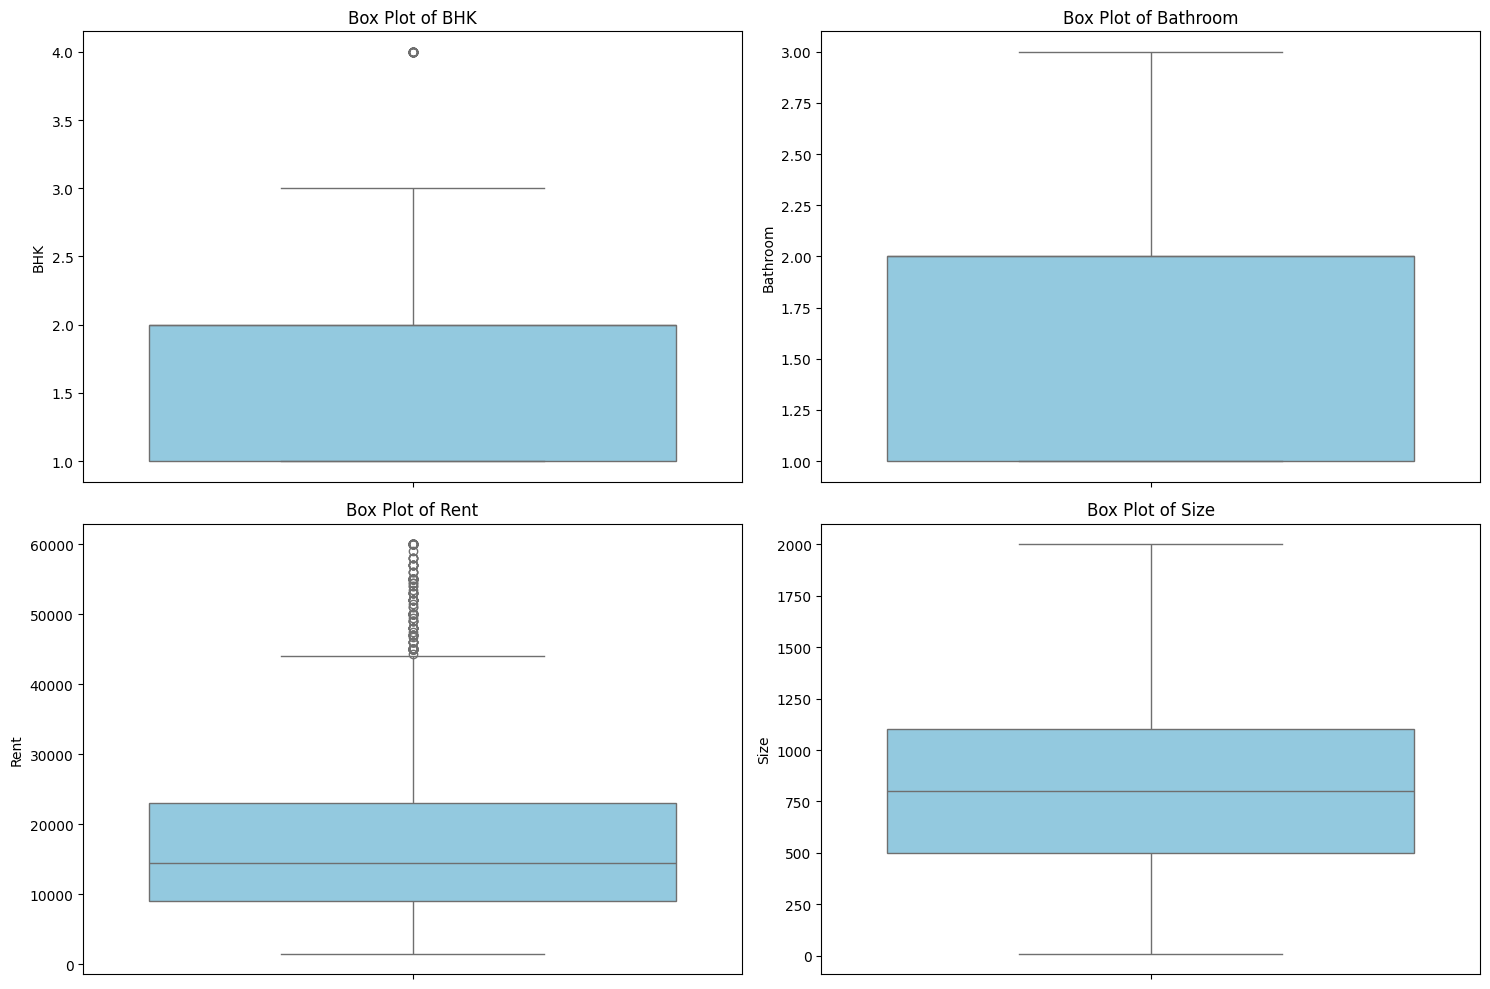

In [44]:
# prompt:  box plot of BHK, Bathroom, Rent, Size

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and outliers removed as in the provided code
# If not, load the data and remove outliers first

# List of numeric columns for box plots
numeric_cols = ['BHK', 'Bathroom', 'Rent', 'Size']

# Create subplots
num_plots = len(numeric_cols)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')  # Use seaborn for better aesthetics
    plt.ylabel(col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [45]:
# prompt: List of categorical columns and Find unique values for each categorical column



# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_cols)

# Find and print unique values for each categorical column
print("\nUnique Values for Each Categorical Column:")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nColumn: {col}")
    print(unique_values)  # Print unique values here for each column


Categorical Columns:
Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

Unique Values for Each Categorical Column:

Column: Posted On
['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022

In [46]:
# prompt: Posted On: Extract new features like year, month, or day from this date column.

import pandas as pd

# Assuming df is already loaded as in the provided code
# If not, load the data first:
# df = pd.read_csv("House_Rent_Dataset.csv")

# Convert 'Posted On' to datetime objects
df['Posted On'] = pd.to_datetime(df['Posted On'])

# Extract year, month, and day
df['Year'] = df['Posted On'].dt.year
df['Month'] = df['Posted On'].dt.month
df['Day'] = df['Posted On'].dt.day

# Display the updated DataFrame with new features
print(df.head())

   Posted On  BHK   Rent  Size            Floor    Area Type  \
0 2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1 2022-05-13    2  20000   800       1 out of 3   Super Area   
2 2022-05-16    2  17000  1000       1 out of 3   Super Area   
3 2022-07-04    2  10000   800       1 out of 2   Super Area   
4 2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  Year  Month  Day  
0         2    Contact Owner  2022      5   18  
1         1    Contact Owner  2022      5   13  
2         1

In [47]:
# prompt: drop posted on column

# Drop the 'Posted On' column
df = df.drop('Posted On', axis=1)

# Display the updated DataFrame
print(df.head())

   BHK   Rent  Size            Floor    Area Type             Area Locality  \
0    2  10000  1100  Ground out of 2   Super Area                    Bandel   
1    2  20000   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi   
2    2  17000  1000       1 out of 3   Super Area   Salt Lake City Sector 2   
3    2  10000   800       1 out of 2   Super Area               Dumdum Park   
4    2   7500   850       1 out of 2  Carpet Area             South Dum Dum   

      City Furnishing Status  Tenant Preferred  Bathroom Point of Contact  \
0  Kolkata       Unfurnished  Bachelors/Family         2    Contact Owner   
1  Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner   
2  Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner   
3  Kolkata       Unfurnished  Bachelors/Family         1    Contact Owner   
4  Kolkata       Unfurnished         Bachelors         1    Contact Owner   

   Year  Month  Day  
0  2022      5   18  
1  2022      5   1

In [48]:
# Extracting 'Floor Number' and 'Total Floors' again
df[['Floor Number', 'Total Floors']] = df['Floor'].str.extract(r'(\d+|Ground|Upper Basement|Lower Basement)? out of (\d+)?')

# Replace textual values with numeric equivalents in 'Floor Number'
df['Floor Number'] = df['Floor Number'].replace({
    'Ground': 0, 'Upper Basement': -1, 'Lower Basement': -2
}).astype(float)

# Convert 'Total Floors' to numeric
df['Total Floors'] = df['Total Floors'].astype(float)

# Drop the original 'Floor' column as it's now redundant
df = df.drop(columns=['Floor'])
df

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Floor Number,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,0.0,2.0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,1.0,3.0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,1.0,3.0
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,1.0,2.0
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,5,18,3.0,5.0
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2022,5,15,1.0,4.0
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,2022,7,10,3.0,5.0
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,2022,7,6,23.0,34.0


In [49]:
from sklearn.preprocessing import LabelEncoder

# Encode Area Type, City with LabelEncoder
le = LabelEncoder()
df['Area Type'] = le.fit_transform(df['Area Type'])
df['City'] = le.fit_transform(df['City'])

# Encode Area Locality: Grouping rare localities
locality_counts = df['Area Locality'].value_counts()
df['Area Locality'] = df['Area Locality'].apply(lambda x: x if locality_counts[x] > 10 else 'Other')
df['Area Locality'] = le.fit_transform(df['Area Locality'])

# One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, columns=['Furnishing Status', 'Tenant Preferred', 'Point of Contact'], drop_first=True)


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['Size', 'Floor Number', 'Total Floors', 'Bathroom']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Rent'])  # Features
y = df['Rent']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,BHK,Size,Area Type,Area Locality,City,Bathroom,Year,Month,Day,Floor Number,Total Floors,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
3452,3,0.597990,1,28,1,0.5,2022,6,22,0.083333,0.035088,True,False,True,False,False,True
2883,1,0.221106,1,28,2,0.0,2022,5,23,NaN,NaN,False,False,True,False,False,True
2061,1,0.145729,1,28,0,0.0,2022,6,23,0.111111,0.035088,True,False,True,False,False,True
2029,2,0.648241,2,28,0,0.5,2022,6,4,0.138889,0.070175,True,False,True,False,False,True
4362,3,0.547739,1,28,3,0.5,2022,7,2,0.083333,0.157895,True,False,True,False,False,True


In [57]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame

# ... (your previous data preprocessing code) ...

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Transform X_test using the same imputer

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 67764771.55197361
R-squared: 0.564003469228149


In [58]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Train and Test a Decision Tree Regressor
# Instantiate the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print results for Decision Tree Regressor
print("Decision Tree Regressor:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

# 2. Train and Test a Random Forest Regressor
# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results for Random Forest Regressor
print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Decision Tree Regressor:
Mean Squared Error: 78892103.47665848
R-squared: 0.49241054557771624

Random Forest Regressor:
Mean Squared Error: 41743051.17647896
R-squared: 0.7314264465155331


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Convert regression predictions to classification for demonstration
y_pred_rf_class = np.where(y_pred_rf > np.mean(y_pred_rf), 1, 0)  # Example classification
y_test_class = np.where(y_test > np.mean(y_test), 1, 0)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_rf_class))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_rf_class)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate the accuracy score
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("\nAccuracy Score:")
print(accuracy)

# Labeling confusion matrix for clarity
print("\nConfusion Matrix (with labels):")
print(f"True Negatives (0, 0): {conf_matrix[0, 0]}")
print(f"False Positives (0, 1): {conf_matrix[0, 1]}")
print(f"False Negatives (1, 0): {conf_matrix[1, 0]}")
print(f"True Positives (1, 1): {conf_matrix[1, 1]}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       543
           1       0.75      0.84      0.79       271

    accuracy                           0.86       814
   macro avg       0.83      0.85      0.84       814
weighted avg       0.86      0.86      0.86       814


Confusion Matrix:
[[468  75]
 [ 43 228]]

Accuracy Score:
0.855036855036855

Confusion Matrix (with labels):
True Negatives (0, 0): 468
False Positives (0, 1): 75
False Negatives (1, 0): 43
True Positives (1, 1): 228


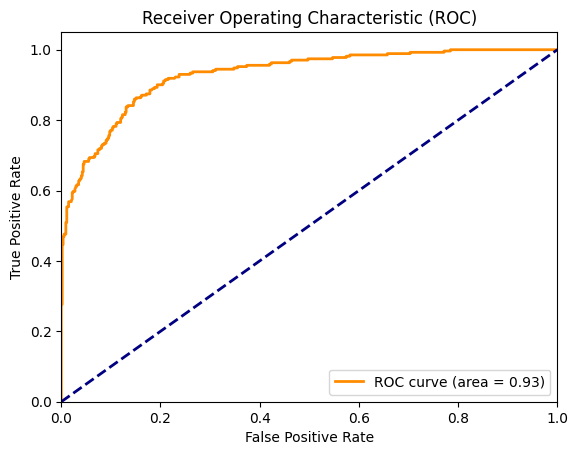

In [63]:
# prompt: plot roc via random forest regressor

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred_rf contains probabilities (not just classes)
# If you only have class predictions, you'll need probabilities
# For example, using predict_proba if available with your model

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_rf) # Use y_pred_rf directly if it's probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [69]:
df.shape

(4069, 18)